In [31]:
import pandas
data = pandas.read_csv("OnlineNewsPopularity.csv")
data.columns = [c.strip() for c in data.columns]  # remove spaces around data
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [32]:
col_mask=data.isnull().any(axis=0) 
row_mask=data.isnull().any(axis=1)
data.loc[row_mask,col_mask]

""


In [33]:
data = data.fillna(0)

In [34]:
data.shape

(39644, 61)

In [35]:
import numpy
numeric = [c for i,c in enumerate(data.columns) if data.dtypes[i] in [numpy.float64, numpy.int64]]
len(numeric)

60

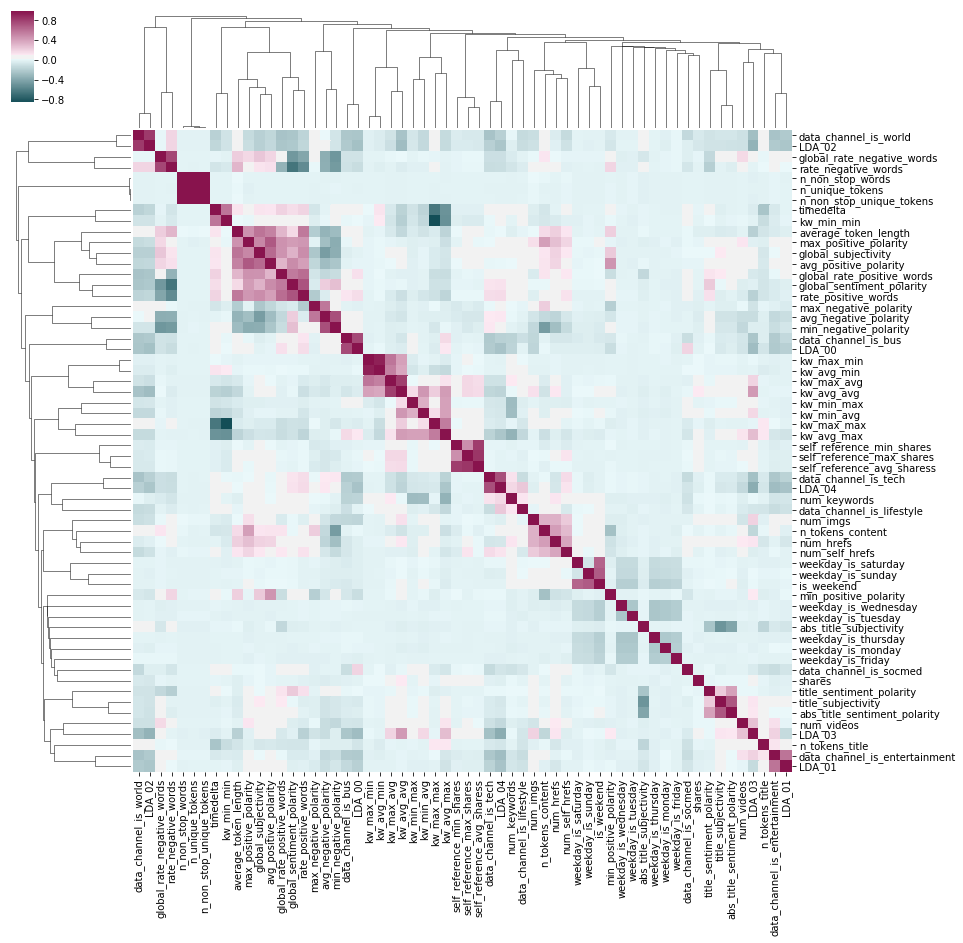

In [36]:
import seaborn
import matplotlib.pyplot as plt
cmap = seaborn.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
seaborn.clustermap(data[numeric].corr(), figsize=(14, 14), cmap=cmap)
plt.show()

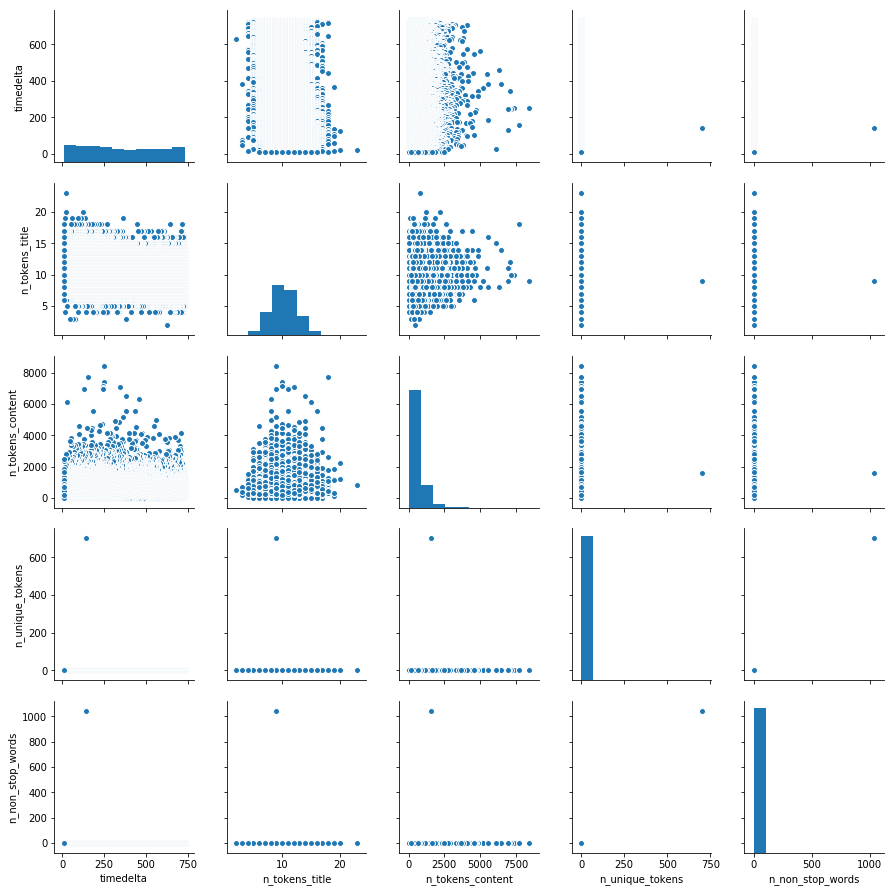

In [37]:
import seaborn
seaborn.pairplot(data[numeric[:5]])
plt.show()

In [38]:
data[data.n_unique_tokens > 100]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
31037,http://mashable.com/2014/08/18/ukraine-civilia...,142.0,9.0,1570.0,701.0,1042.0,650.0,11.0,10.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5900


In [39]:
data_clean = data[data.n_unique_tokens < 100].copy()

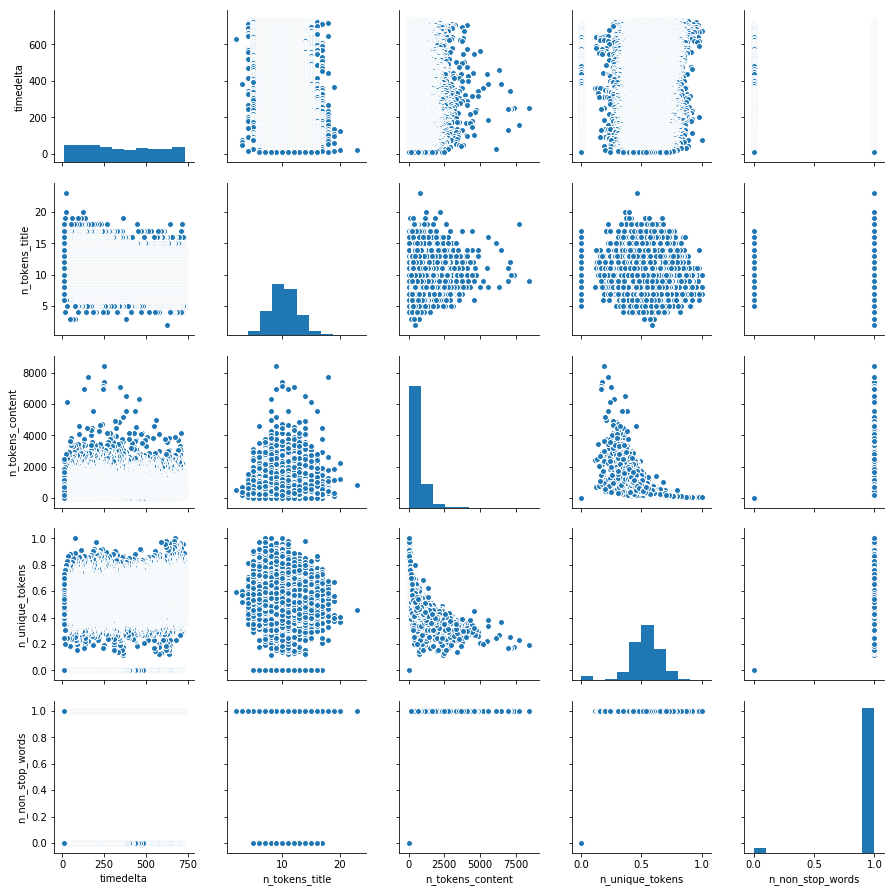

In [40]:
seaborn.pairplot(data_clean[numeric[:5]])
plt.show()

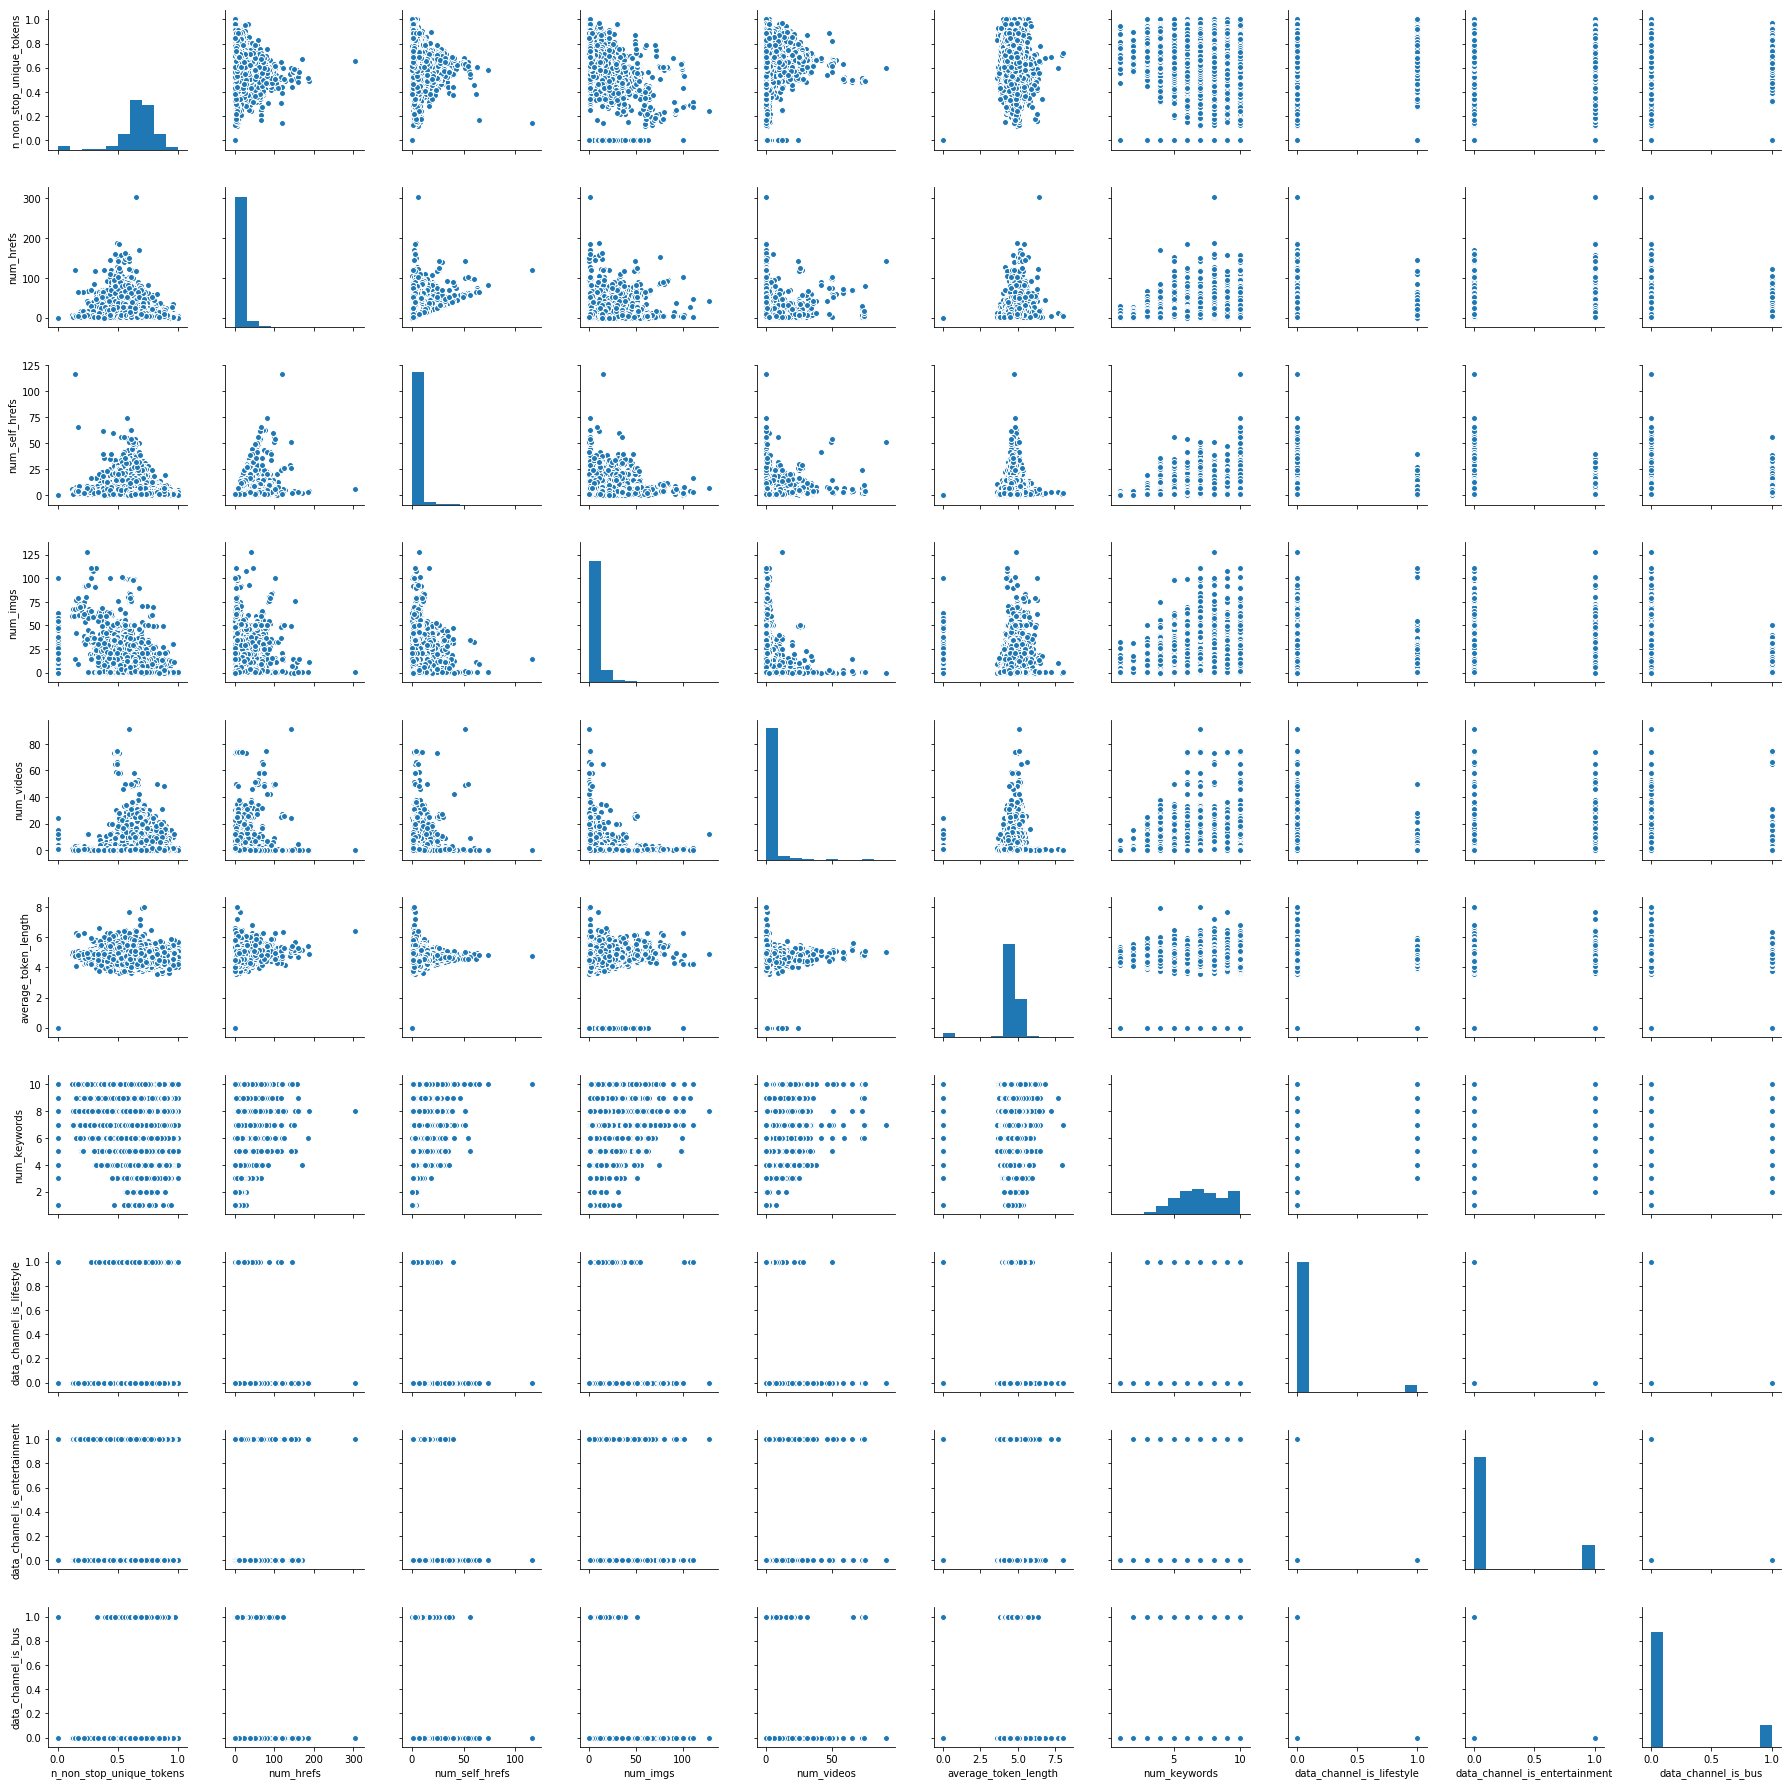

In [41]:
seaborn.pairplot(data_clean[numeric[5:15]])
plt.show()

In [42]:
data_clean.hist(figsize=(16,16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002708ABBF048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027082CA1DA0>]], dtype=object)

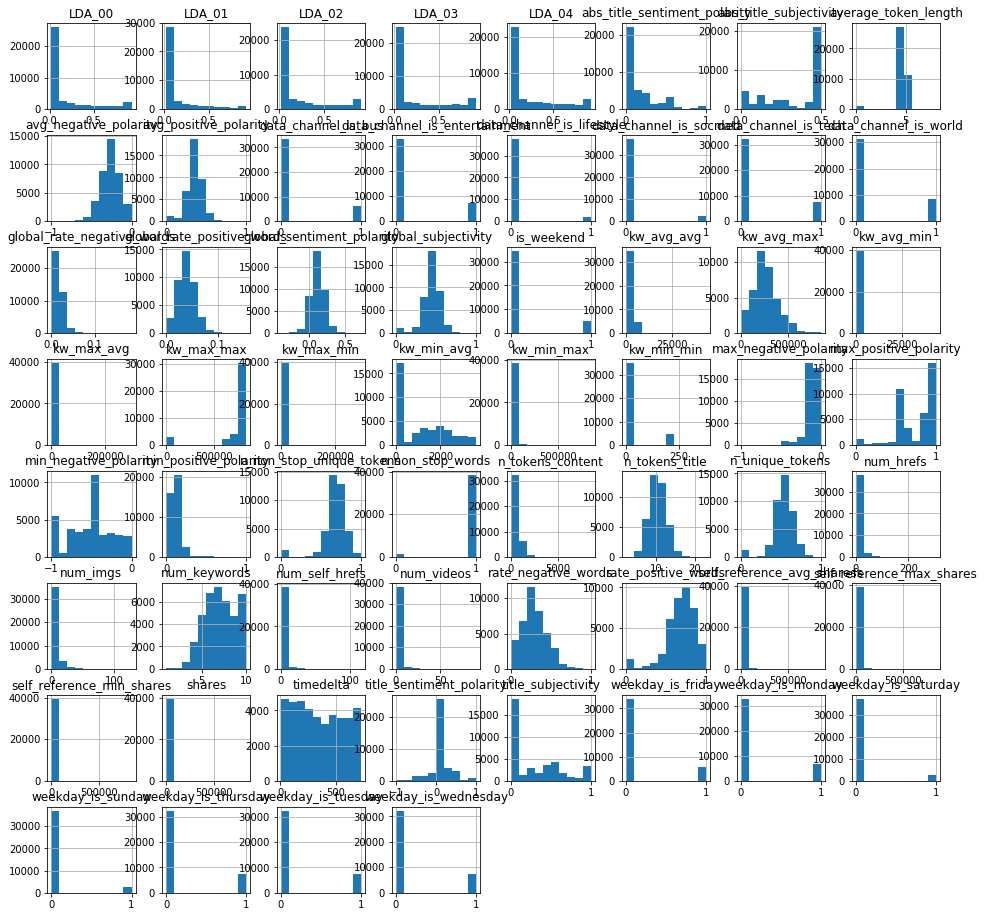

In [43]:
import numpy
numpy.log(data_clean["shares"]).hist(bins=100)
plt.show()

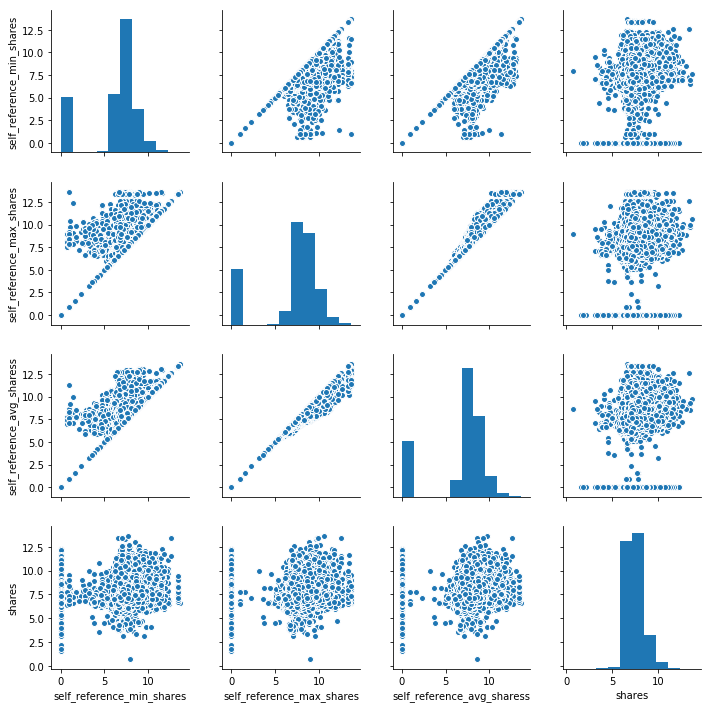

In [44]:
shares = data_clean[[c for c in numeric if "share" in c]].copy()
for c in shares.columns:
    shares[c] = numpy.log(shares[c] + 1)
seaborn.pairplot(shares)
plt.show()

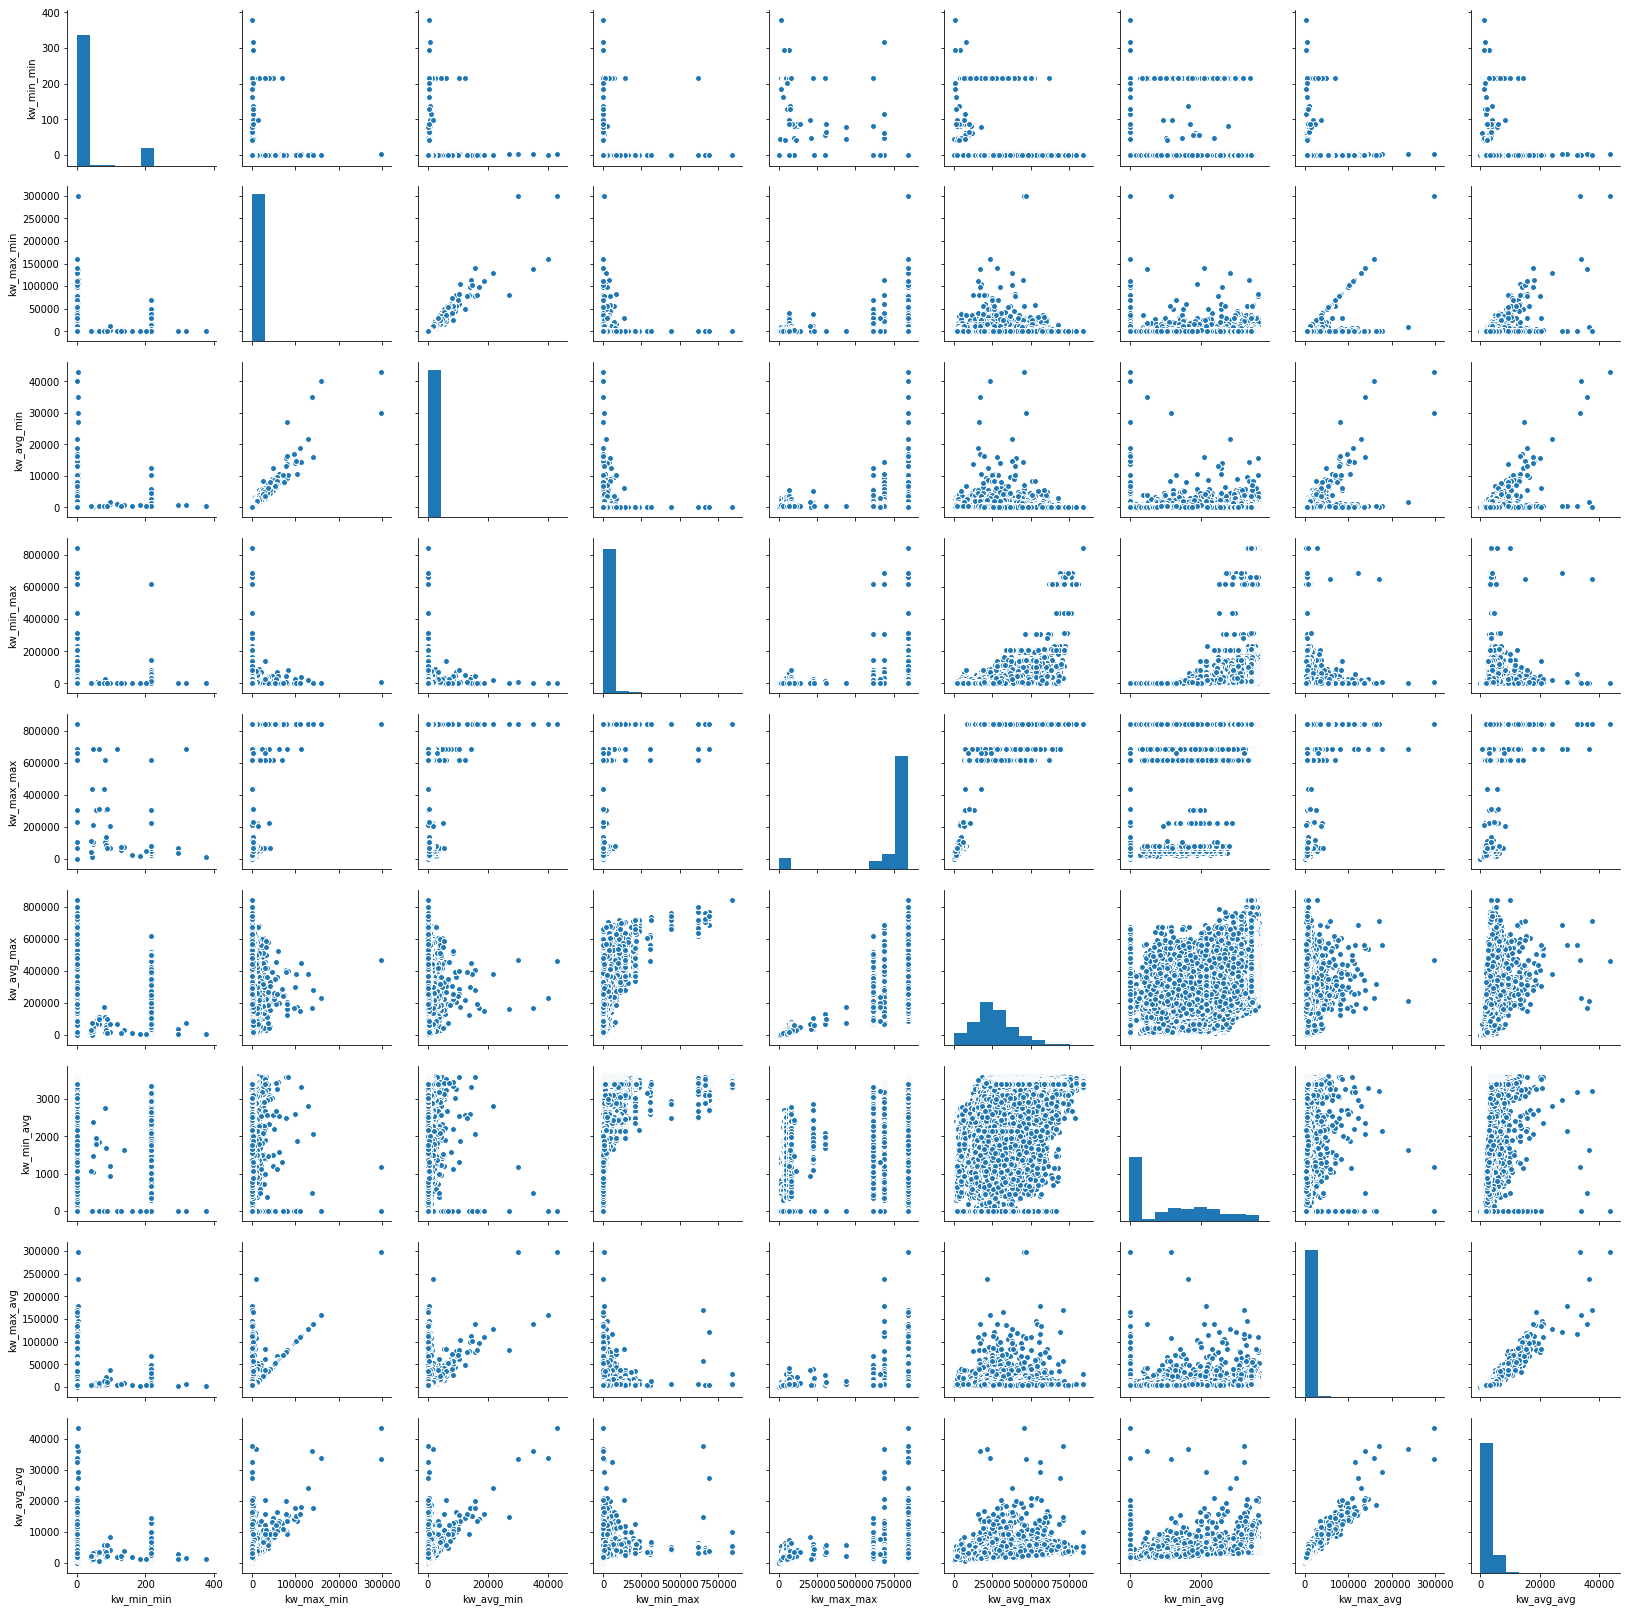

In [45]:
kw = data_clean[[c for c in numeric if "kw" in c]].copy()
#for c in shares.columns:
#    shares[c] = numpy.log(shares[c] + 1)
seaborn.pairplot(kw)
plt.show()

In [46]:
desc = data_clean.describe().T
desc["log"] = (desc["max"] > desc["50%"] * 9) & (desc["max"] > 1)
desc["scale"] = ""
desc.loc[desc["log"],"scale"] = "log"
desc[["mean", "min", "50%", "max", "scale"]]

,mean,min,50%,max,scale
timedelta,354.535832,8.000000,339.000000,731.000000,
n_tokens_title,10.398784,2.000000,10.000000,23.000000,
n_tokens_content,546.488914,0.000000,409.000000,8474.000000,log
n_unique_tokens,0.530547,0.000000,0.539216,1.000000,
n_non_stop_words,0.970209,0.000000,1.000000,1.000000,
n_non_stop_unique_tokens,0.672796,0.000000,0.690476,1.000000,
num_hrefs,10.883687,0.000000,8.000000,304.000000,log
num_self_hrefs,3.293469,0.000000,3.000000,116.000000,log
num_imgs,4.542971,0.000000,1.000000,128.000000,log
num_videos,1.249905,0.000000,0.000000,91.000000,log


In [47]:
datas = data_clean.copy()

In [48]:
datas.drop(['url'],inplace=True,axis=1)

In [49]:
target=datas['shares']
datas.drop(['shares'],inplace=True,axis=1)

In [50]:
features = datas.copy()

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [52]:
from sklearn.ensemble import RandomForestRegressor
clr = RandomForestRegressor(min_samples_leaf=20, n_estimators=50, min_weight_fraction_leaf=0.01, min_samples_split=10)
clr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=20, min_samples_split=10,
           min_weight_fraction_leaf=0.01, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [53]:
tpredicted = clr.predict(X_train)
df = pandas.DataFrame()
df["train_predicted"] = tpredicted
df["train_expected"] = y_train
df.corr()

,train_predicted,train_expected
train_predicted,1.000000,-0.006361
train_expected,-0.006361,1.000000


In [54]:
df = pandas.DataFrame()
df["test_predicted"] = clr.predict(X_test)
df["test_expected"] = y_test
df.corr()

,test_predicted,test_expected
test_predicted,1.000000,-0.004455
test_expected,-0.004455,1.000000


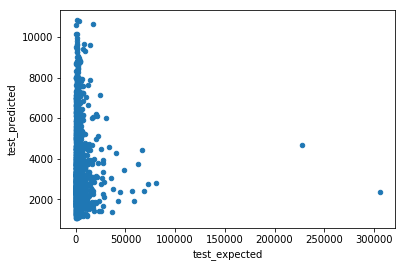

In [55]:
df.plot(x ="test_expected", y="test_predicted", kind="scatter")
plt.show()

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(min_samples_leaf=20, n_estimators=50, min_weight_fraction_leaf=0.01, min_samples_split=10)
est.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=10, min_weight_fraction_leaf=0.01,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [57]:
tpredicted = est.predict(X_train)
df = pandas.DataFrame()
df["train_predicted"] = tpredicted
df["train_expected"] = y_train
df.corr()

,train_predicted,train_expected
train_predicted,1.000000,-0.004833
train_expected,-0.004833,1.000000


In [58]:
df = pandas.DataFrame()
df["train_predicted"] = est.predict(X_train)
df["train_expected"] = y_train
df.corr()

,train_predicted,train_expected
train_predicted,1.000000,-0.004833
train_expected,-0.004833,1.000000
